In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import networkx as nx
from scipy import sparse
import matplotlib.pyplot as plt
import os
import pickle
import plotly.graph_objects as go
from matplotlib import cm
from scipy.spatial import distance
import copy
import plotly.io as pio

In [3]:
import torch
import torch_geometric
from torch_geometric.data import Data
from torch_geometric.io import read_txt_array
from hypercot import *

 No module named 'celluloid'. If you need to use hypernetx.algorithms.contagion, please install additional packages by running the following command: pip install .['all']
 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


### Armadillo

In [370]:
### processing armadillo0_data
path = "data/armadillo0"
armadillo = process_file(path)
G0,v0, plot_data, layout = tosca_plotter(armadillo)

min_graph_size = 40 # Stop reducing after this point
low_rank_approx_k = 500 # Number of eigenvectors in low-rank approximation
low_rank_factor = 1 # If Laplacian.shape[0]/low_rank_approx_k greater than this factor, use low-rank
t_init = 20.

params = {'min_graph_size':min_graph_size, 
          'low_rank_approx_k':low_rank_approx_k,
          'low_rank_factor':low_rank_factor}

G_list, v_list, plot_data_list, memberMat_list = multiscale_nerve(G0, v0, plot_data, t_init, params)

camera_data={'up': {'x': 0, 'y': 1, 'z': 0},'center': {'x': 0, 'y': 0.0, 'z': 0}, 
             'eye': {'x': 0.9, 'y': -0.1, 'z': 1.5}}

# # save the data
# with open("data/armadillo0.pkl",'wb') as handle:
#     pickle.dump({"G_list":G_list, "v_list":v_list, "plot_data_list": plot_data_list, "memberMat_list":memberMat_list, 
#             "camera_data": camera_data}, handle)

Graph size 17483, using t=20.0 and reducing...
Graph size 17483, using low-rank approx with k=500
Kernel computed in 21.4 seconds
Nerve of size 366 computed in 7.93 seconds
Graph size 366, using t=2.56348108539441 and reducing...
Graph size 366, using full kernel
Kernel computed in 0.16 seconds
Nerve of size 106 computed in 0.0301 seconds
Graph size 106, using t=2.02530586526477 and reducing...
Graph size 106, using full kernel
Kernel computed in 0.00731 seconds
Nerve of size 42 computed in 0.0109 seconds
Graph size 42, using t=1.6232492903979003 and reducing...
Graph size 42, using full kernel
Kernel computed in 0.00231 seconds
Nerve of size 19 computed in 0.00498 seconds


In [359]:
with open("data/armadillo0.pkl",'rb') as handle:
    armadillo0_data = pickle.load(handle)
    
G_list = armadillo0_data["G_list"]
v_list = armadillo0_data["v_list"]
plot_data_list = armadillo0_data["plot_data_list"]
memberMat_list = armadillo0_data["memberMat_list"]
camera_data = armadillo0_data["camera_data"]

In [369]:
for G in G_list:
    print("nodes", len(G.nodes))
    print("edges", len(G.edges))

nodes 17483
edges 52443
nodes 506
edges 3632
nodes 147
edges 731
nodes 54
edges 224
nodes 23
edges 76


In [337]:
idx = 4 # toggle idx = 0, 1, 2, 3 to see different nerves
fig = go.Figure(data=[plot_data_list[idx][0],plot_data_list[idx][1]], layout=layout)
# fig = go.Figure(data=plot_data_list[idx][0], layout=layout)
fig.update_layout(scene_camera=camera_data,title='')
fig.show()

In [292]:
len(memberMat_list)

5

In [362]:
for m in memberMat_list:
    if m != None:
        print(m.shape)

(506, 17483)
(147, 506)
(54, 147)
(23, 54)


In [294]:
hypergraph_list = []
for i in range(1, len(memberMat_list)):
    mm = memberMat_list[i]
    h_i = {i:[str(v) for v in np.nonzero(mm[i])[1]] for i in range(mm.shape[0])}
    hypergraph_list.append(h_i)

In [295]:
# convert hypergraphs so that the all have the same set of vertices
h0 = hypergraph_list[0]
hypergraph_list_new = [h0]
for i in range(1, len(hypergraph_list)):
    h_i = hypergraph_list[i]
    h_i_new = convert_hypergraph(h0, h_i)
    hypergraph_list_new.append(h_i_new)
    h0 = h_i_new

In [296]:
num_v = memberMat_list[1].shape[1]
print(num_v)

17483


In [297]:
w_list = []
for h in hypergraph_list_new:
    w = get_omega_no_weight(h, num_v)
    w_list.append(w)

In [304]:
wass_dist_list = []
Tv_list = []
for i in range(len(w_list)):
    wass_dist, Tv = cot_wass(w_list[0], w_list[i], niter=100, log=True, verbose = False, random_init=False)
    wass_dist_list.append(wass_dist)
    Tv_list.append(Tv)

from cot
from cot
from cot
from cot


In [312]:
Tv_list[-1][np.argmax(Tv_list[-1], axis=0),:]

array([[0.00197628, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.00197628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00197628, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.001

([<matplotlib.axis.XTick at 0x7f8cda020c70>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

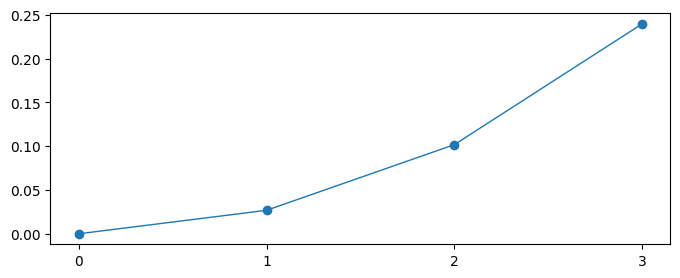

In [299]:
plt.figure(figsize=(8, 3), dpi=100)
plt.plot(wass_dist_list, marker="o", linewidth=1)
plt.xticks(np.arange(len(wass_dist_list)), np.arange(len(wass_dist_list)))

In [341]:
### color transfer
# color the finest mapper
# idx = 0 => the original graph
idx = 1

cmap = cm.get_cmap('magma')
G = G_list[idx]
n = len(G)
v = v_list[idx]
print(n,v.shape)

# Color points by distance to min-norm point
query_pt = v[np.argmax(np.linalg.norm(v,axis=1)),:]
dist_to_query = distance.cdist(query_pt.reshape(1,-1),v)
distances_ranked = np.argsort(dist_to_query)[0]
sort_indices = np.argsort(distances_ranked)
colors = cmap(np.array(range(n))/n) # use distance to linearly map colors
original_colors = colors[sort_indices] # original order, but values are based on distance

trace_nodes, trace_edges = color_plot_helpers(G, v, 5, original_colors)
fig = go.Figure(data=[trace_edges,trace_nodes],layout=layout)
fig.update_layout(scene_camera=camera_data,title='', paper_bgcolor='rgb(255,255,255)')
fig.show()

506 (506, 3)


/var/folders/9_/h6m7ysn52814sfx_wyg9fxgm0000gn/T/ipykernel_45524/1759737414.py:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [340]:
# color coarser mappers based on matching with the finest mapper
idx = 4 # idx = 2, 3, 4
G = G_list[idx]
n = len(G)
v = v_list[idx]
print(n,v.shape)
colors = original_colors[Tv_list[idx-1].argmax(axis=0)]
print(colors.shape)

trace_nodes, trace_edges = color_plot_helpers(G,v, 5, colors)
fig = go.Figure(data=[trace_edges,trace_nodes],layout=layout)
fig.update_layout(scene_camera=camera_data,title='')
# fig.write_image(f"figures/centaur01_src_{idx}.png",scale=10)
fig.show()

23 (23, 3)
(23, 4)


### Stanford Bunny

In [371]:
# ### processing bunny_data
path = "data/bun_zipper"
armadillo = process_file(path)
G0,v0, plot_data, layout = tosca_plotter(armadillo)

min_graph_size = 40 # Stop reducing after this point
low_rank_approx_k = 400 # Number of eigenvectors in low-rank approximation
low_rank_factor = 1 # If Laplacian.shape[0]/low_rank_approx_k greater than this factor, use low-rank
t_init = 5.

params = {'min_graph_size':min_graph_size, 
          'low_rank_approx_k':low_rank_approx_k,
          'low_rank_factor':low_rank_factor}

G_list, v_list, plot_data_list, memberMat_list = multiscale_nerve(G0, v0, plot_data, t_init, params)

camera_data={'up': {'x': 0, 'y': 1, 'z': 0},'center': {'x': 0, 'y': 0.0, 'z': 0}, 
             'eye': {'x': -0.5, 'y': 0.5, 'z': 1.7}}

# # save the data
# with open("data/bunny.pkl",'wb') as handle:
#     pickle.dump({"G_list":G_list, "v_list":v_list, "plot_data_list": plot_data_list, "memberMat_list":memberMat_list, 
#             "camera_data": camera_data}, handle)

Graph size 34834, using t=5.0 and reducing...
Graph size 34834, using low-rank approx with k=400
Kernel computed in 40.7 seconds
Nerve of size 423 computed in  35 seconds
Graph size 423, using t=2.626340367375042 and reducing...
Graph size 423, using low-rank approx with k=400
Kernel computed in 0.632 seconds
Nerve of size 119 computed in 0.0455 seconds
Graph size 119, using t=2.0755469613925306 and reducing...
Graph size 119, using full kernel
Kernel computed in 0.0101 seconds
Nerve of size 44 computed in 0.0119 seconds
Graph size 44, using t=1.6434526764861872 and reducing...
Graph size 44, using full kernel
Kernel computed in 0.00183 seconds
Nerve of size 22 computed in 0.00593 seconds


In [374]:
with open("data/bunny.pkl",'rb') as handle:
    bunny_data = pickle.load(handle)
G_list = bunny_data["G_list"]
v_list = bunny_data["v_list"]
plot_data_list = bunny_data["plot_data_list"]
memberMat_list = bunny_data["memberMat_list"]
camera_data = bunny_data["camera_data"]

In [375]:
for G in G_list:
    print("nodes", len(G.nodes))
    print("edges", len(G.edges))

nodes 34834
edges 104288
nodes 423
edges 3047
nodes 114
edges 502
nodes 44
edges 183
nodes 22
edges 85


In [356]:
idx = 4 # toggle idx = 0, 1, 2, 3 to see different nerves
fig = go.Figure(data=[plot_data_list[idx][0],plot_data_list[idx][1]], layout=layout)
# fig = go.Figure(data=plot_data_list[idx][0], layout=layout)
fig.update_layout(scene_camera=camera_data,title='')
fig.show()

In [344]:
len(memberMat_list)

5

In [345]:
memberMat_list[1].shape

(423, 34834)

In [346]:
hypergraph_list = []
for i in range(1, len(memberMat_list)):
    mm = memberMat_list[i]
    h_i = {i:[str(v) for v in np.nonzero(mm[i])[1]] for i in range(mm.shape[0])}
    hypergraph_list.append(h_i)

In [347]:
# convert hypergraphs so that the all have the same set of vertices
h0 = hypergraph_list[0]
hypergraph_list_new = [h0]
for i in range(1, len(hypergraph_list)):
    h_i = hypergraph_list[i]
    h_i_new = convert_hypergraph(h0, h_i)
    hypergraph_list_new.append(h_i_new)
    h0 = h_i_new

In [348]:
num_v = memberMat_list[1].shape[1]
print(num_v)

34834


In [349]:
w_list = []
for h in hypergraph_list_new:
    w = get_omega_no_weight(h, num_v)
    w_list.append(w)

In [350]:
wass_dist_list = []
Tv_list = []
for i in range(len(w_list)):
    wass_dist, Tv = cot_wass(w_list[0], w_list[i], niter=100, log=True, verbose = False, random_init=False)
    wass_dist_list.append(wass_dist)
    Tv_list.append(Tv)

from cot
from cot
from cot
from cot


([<matplotlib.axis.XTick at 0x7f8c995099f0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

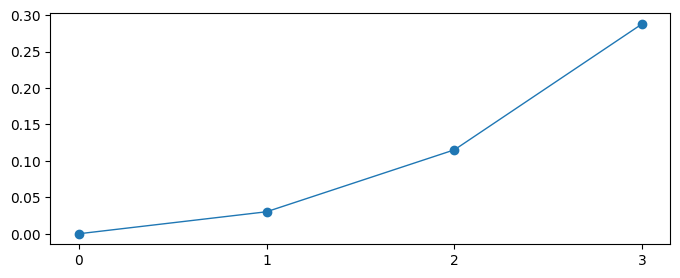

In [271]:
plt.figure(figsize=(8, 3), dpi=100)
plt.plot(wass_dist_list, marker="o", linewidth=1)
plt.xticks(np.arange(len(wass_dist_list)), np.arange(len(wass_dist_list)))

In [351]:
### color transfer
# color the finest mapper
# idx = 0 => the original graph
idx = 1

cmap = cm.get_cmap('magma')
G = G_list[idx]
n = len(G)
v = v_list[idx]
print(n,v.shape)

# Color points by distance to min-norm point
query_pt = v[np.argmax(np.linalg.norm(v,axis=1)),:]
dist_to_query = distance.cdist(query_pt.reshape(1,-1),v)
distances_ranked = np.argsort(dist_to_query)[0]
sort_indices = np.argsort(distances_ranked)
colors = cmap(np.array(range(n))/n) # use distance to linearly map colors
original_colors = colors[sort_indices] # original order, but values are based on distance

trace_nodes, trace_edges = color_plot_helpers(G, v, 5, original_colors)
fig = go.Figure(data=[trace_edges,trace_nodes],layout=layout)
fig.update_layout(scene_camera=camera_data,title='', paper_bgcolor='rgb(255,255,255)')
fig.show()

423 (423, 3)


/var/folders/9_/h6m7ysn52814sfx_wyg9fxgm0000gn/T/ipykernel_45524/545308850.py:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [357]:
# color coarser mappers based on matching with the finest mapper
idx = 4 # idx = 2, 3, 4
G = G_list[idx]
n = len(G)
v = v_list[idx]
print(n,v.shape)
colors = original_colors[Tv_list[idx-1].argmax(axis=0)]
print(colors.shape)

trace_nodes, trace_edges = color_plot_helpers(G,v, 5, colors)
fig = go.Figure(data=[trace_edges,trace_nodes],layout=layout)
fig.update_layout(scene_camera=camera_data,title='')
# fig.write_image(f"figures/centaur01_src_{idx}.png",scale=10)
fig.show()

22 (22, 3)
(22, 4)


In [314]:
def color_plot_helpers(G,v,node_size,node_colors):
    #we  need to create lists that contain the starting and ending coordinates of each edge.
    x_edges=[]
    y_edges=[]
    z_edges=[]

    #need to fill these with all of the coordiates
    edgeList = list(G.edges)
    for edge in edgeList:
        #format: [beginning,ending,None]
        x_coords = [v[edge[0],0],v[edge[1],0],None]
        x_edges += x_coords

        y_coords = [v[edge[0],1],v[edge[1],1],None]
        y_edges += y_coords

        z_coords = [v[edge[0],2],v[edge[1],2],None]
        z_edges += z_coords

    #create a trace for the edges
    trace_edges = go.Scatter3d(x=x_edges,
                            y=y_edges,
                            z=z_edges,
                            mode='lines',
                            line=dict(color='gray', width=0.3),
                            hoverinfo='none')

    #create a trace for the nodes
    trace_nodes = go.Scatter3d(x=v[:,0],
                            y=v[:,1],
                            z=v[:,2],
                            mode='markers',
                            marker=dict(symbol='circle',
                                        size=node_size,
                                        color=node_colors
                                    ),
                            text=list(range(len(G))),
                            hoverinfo='text')
    return trace_nodes, trace_edges

In [289]:
def cot_wass(X1, X2, w1 = None, w2 = None, v1 = None, v2 = None,
              niter=10, algo='emd', reg=0,algo2='emd',
              reg2=0, verbose=True, log=False, random_init=False, C_lin=None): 
    print("from cot")
    if v1 is None:
        v1 = np.ones(X1.shape[1]) / X1.shape[1]  # is (d,)
    if v2 is None:
        v2 = np.ones(X2.shape[1]) / X2.shape[1]  # is (d',)
    if w1 is None:
        w1 = np.ones(X1.shape[0]) / X1.shape[0]  # is (n',)
    if w2 is None:
        w2 = np.ones(X2.shape[0]) / X2.shape[0]  # is (n,)
    
#     print(X1.shape[0], X2.shape[0])
    Ts = np.eye(X1.shape[0]) / (X1.shape[0])
    if not random_init:
#         Ts = np.ones((X1.shape[0], X2.shape[0])) / (X1.shape[0] * X2.shape[0])  # is (n,n')
        Tv = np.ones((X1.shape[1], X2.shape[1])) / (X1.shape[1] * X2.shape[1])  # is (d,d')
    else:
#         Ts=random_gamma_init(w1,w2) 
        Tv=random_gamma_init(v1,v2)
#     print(Ts)
#     print(np.sum(Ts), np.sum(Tv))


    constC_s, hC1_s, hC2_s = init_matrix_np(X1, X2, v1, v2)

    constC_v, hC1_v, hC2_v = init_matrix_np(X1.T, X2.T, w1, w2)
    cost = np.inf

    log_out ={}
    log_out['cost'] = []
    
#     if len(w1) == len(w2):
#         C_lin = np.identity(len(w1))

    M = constC_v - np.dot(hC1_v, Ts).dot(hC2_v.T) 
    
    
    for i in range(niter):
        Tsold = Ts
        Tvold = Tv
        costold = cost

#         M = constC_s - np.dot(hC1_s, Tv).dot(hC2_s.T)
#         if C_lin is not None:
#             M=M+C_lin 
                  
#         if algo == 'emd':
#             Ts = ot.emd(w1, w2, M, numItermax=1e7)
#         elif algo == 'sinkhorn':
#             Ts = ot.sinkhorn(w1, w2, M, reg)

#         M = constC_v - np.dot(hC1_v, Ts).dot(hC2_v.T)    
        if algo2 == 'emd':
            Tv = ot.emd(v1, v2, M, numItermax=1e7)
        elif algo2 == 'sinkhorn':
            Tv = ot.sinkhorn(v1,v2, M, reg2)

#         delta = np.linalg.norm(Ts - Tsold) + np.linalg.norm(Tv - Tvold)
        delta = np.linalg.norm(Tv - Tvold)
        cost = np.sum(M * Tv)
        if delta < 1e-16 or np.abs(costold - cost) < 1e-7:
            if verbose:
                print('converged at iter ', i)
            break
#     if log:
#         return Ts, Tv, cost, log_out
#     else:
#         return Ts, Tv, cost
    return cost, Tv




In [47]:
def get_omega_no_weight(h_dict, num_vertices):
    # w_ij = 1 if node in the hyperedge, otherwise w_ij = 0
    num_edges = len(h_dict)
    w = np.zeros((num_vertices, num_edges))
    for edge_idx in h_dict:
        nodes_idx_list = [int(v) for v in h_dict[edge_idx]]
        for node_idx in nodes_idx_list:
            w[node_idx, edge_idx] = 1
    return w

In [32]:
def convert_hypergraph(h0, h1):
    # convert h1 so that the vertex set of h1 is the same as h0
    h1_new = {}
    for he in h1:
        vlist = h1[he]
        vlist_new = []
        for v in vlist: #v in h1 is the hyperedge in h0
            vlist_new += h0[int(v)]
        vlist_new = list(set(vlist_new))
        h1_new[he] = vlist_new
    return h1_new

In [5]:
def process_file(path):
    pos = read_txt_array(f'{path}.vert')
    face = read_txt_array(f'{path}.tri', dtype=torch.long)
    face = face - face.min()  # Ensure zero-based index.
    data = Data(pos=pos, face=face.t().contiguous())
    return data

def tosca_plotter(data):
    f = data.face.numpy().T
    v = data.pos.numpy().astype(float)
    v = v/v.max()
    f += (0-f.min()) #Fix indexing; f.min() should be zero
    
    mesh2graph = torch_geometric.transforms.FaceToEdge()
    G_raw = mesh2graph(data)
    
    G0 = torch_geometric.utils.to_networkx(G_raw,to_undirected=True)
    v0 = v
    
    #we need to separate the X,Y,Z coordinates for Plotly
    edgeList = list(G0.edges)
    n = len(G0)
    x_nodes = np.array([v0[i][0] for i in range(n)])# x-coordinates of nodes
    y_nodes = np.array([v0[i][1] for i in range(n)])# y-coordinates
    z_nodes = np.array([v0[i][2] for i in range(n)])# z-coordinates
    
    #we  need to create lists that contain the starting and ending coordinates of each edge.
    x_edges=[]
    y_edges=[]
    z_edges=[]

    #need to fill these with all of the coordiates
    for edge in edgeList:
        #format: [beginning,ending,None]
        x_coords = [v0[edge[0],0],v0[edge[1],0],None]
        x_edges += x_coords

        y_coords = [v0[edge[0],1],v0[edge[1],1],None]
        y_edges += y_coords

        z_coords = [v0[edge[0],2],v0[edge[1],2],None]
        z_edges += z_coords
        
    #create a trace for the edges
    trace_edges = go.Scatter3d(x=x_edges,
                            y=y_edges,
                            z=z_edges,
                            mode='lines',
                            line=dict(color='black', width=0.5),
                            hoverinfo='none')
    
    #create a trace for the nodes
    trace_nodes = go.Scatter3d(x=x_nodes,
                             y=y_nodes,
                            z=z_nodes,
                            mode='markers',
                            marker=dict(symbol='circle',
                                        size=2,
                                        color='red', #color the nodes according to their community
    #                                     colorscale=['lightgreen','magenta'], #either green or mageneta
                                        line=dict(color='black', width=0.5)),
                            text=list(range(n)),
                            hoverinfo='text')
        
    #we need to set the axis for the plot 
    axis = dict(showbackground=False,
                showline=False,
                zeroline=False,
                showgrid=False,
                showticklabels=False,
                title='')
    #also need to create the layout for our plot
    layout = go.Layout(title="Original mesh",
                    width=650,
                    height=625,
                    showlegend=False,
                    scene=dict(xaxis=dict(axis),
                            yaxis=dict(axis),
                            zaxis=dict(axis),
                            ),
                    margin=dict(t=100),
                    hovermode='closest')
    #Include the traces we want to plot and create a figure
    plot_data = [trace_edges, trace_nodes]
    return G0,v0, plot_data, layout

# def computeMultiScale(data,output_filename,para):
#     G0,v0,plot_data,layout = tosca_plotter(data)
#     G_list, v_list, memberMat_list = hypercot.multiscale_nerve(G0,v0,para)
# #     with open(output_filename,'wb') as handle:
# #         # camera_data = {'up': {'x': 0, 'y': 0, 'z': 1},'center': {'x': 0, 'y': 0.0, 'z': 0}, 'eye': {'x': 1.5, 'y': -1.75, 'z': 0}}
# #         #armadillo
# #         camera_data={'up': {'x': 0, 'y': 1, 'z': 0},'center': {'x': 0, 'y': 0.0, 'z': 0}, 'eye': {'x': 0.0, 'y': 0.0, 'z': -1.8}}
# #         data0 = {'G':G_list,'v':v_list, 'mmat': memberMat_list,'camera': camera_data}
        
# #         pickle.dump(data0,handle)
#     return G_list, v_list, memberMat_list